<a href="https://colab.research.google.com/github/jamesbengi/Handwriten-digit-recognizer/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#load the dataset
(X_train, y_train),(X_test, y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
#convert to one hot vector
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [6]:
#reshape the input features
X_train=np.reshape(X_train,[-1,784])
X_train=X_train.astype('float32') / 255
X_test=np.reshape(X_test,[-1,784])
X_test=X_test.astype('float32') / 255

In [7]:
X_test.shape

(10000, 784)

In [8]:
#model a
model_a= keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model_a.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
history_a=model_a.fit(X_train,y_train,
                    batch_size=64,
                    validation_data=(X_test,y_test),
                    epochs=20
                    )

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8473 - loss: 0.5248 - val_accuracy: 0.9570 - val_loss: 0.1425
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9578 - loss: 0.1376 - val_accuracy: 0.9678 - val_loss: 0.1112
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9710 - loss: 0.0970 - val_accuracy: 0.9724 - val_loss: 0.0931
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9777 - loss: 0.0732 - val_accuracy: 0.9697 - val_loss: 0.0974
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9819 - loss: 0.0622 - val_accuracy: 0.9736 - val_loss: 0.0879
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9845 - loss: 0.0514 - val_accuracy: 0.9748 - val_loss: 0.0852
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9865 - loss: 0.0450 - val_accuracy: 0.9729 - val_loss: 0.0902
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9879 - loss: 0.0381 - val_accuracy: 0.

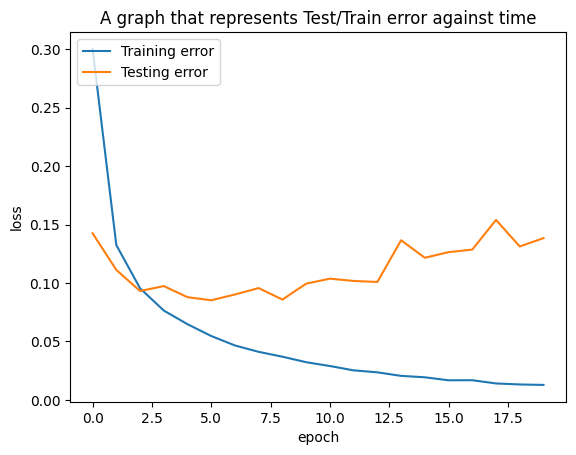

In [15]:
plt.figure()
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('A graph that represents Test/Train error against time')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training error','Testing error'], loc = 'upper left')
plt.show()

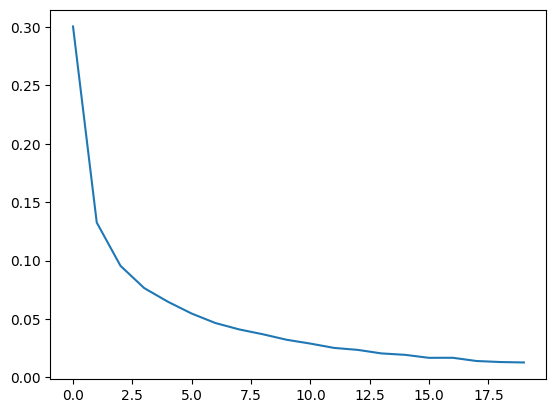

In [11]:
history_a_df = pd.DataFrame(history_a.history)
history_a_df['loss'].plot();

In [42]:
loss, acc= model_a.evaluate(X_test,y_test)
print("Accuracy on Test data:",acc)
print("Loss on Test Data:", loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9791 - loss: 0.2012
Accuracy on Test data: 0.9811000227928162
Loss on Test Data: 0.18014304339885712


In [27]:
#model b
model_b= keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model_b.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy']

)

In [36]:
history_b=model_b.fit(X_train,y_train,
                    batch_size=64,
                    validation_data=(X_test,y_test),
                    epochs=20
                    )

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9993 - loss: 0.0025 - val_accuracy: 0.9860 - val_loss: 0.1098
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 1.6902e-05 - val_accuracy: 0.9865 - val_loss: 0.1127
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 4.1260e-06 - val_accuracy: 0.9864 - val_loss: 0.1143
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 2.5422e-06 - val_accuracy: 0.9863 - val_loss: 0.1156
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.6857e-06 - val_accuracy: 0.9865 - val_loss: 0.1167
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.5512e-06 - val_accuracy: 0.9865 - val_loss: 0.1175
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.2738e-06 - val_accuracy: 0.9865 - val_loss: 0.1183
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1

In [37]:
loss, acc= model_b.evaluate(X_test,y_test)
print("Accuracy on Test data:",acc)
print("Loss on Test Data:", loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9840 - loss: 0.1651
Accuracy on Test data: 0.9869999885559082
Loss on Test Data: 0.1242252066731453


In [ ]:
history_b_df = pd.DataFrame(history_b.history)
history_b_df['loss'].plot();